#phase 3 overleaf link:https://www.overleaf.com/3343665945fvrrwmgbnjyj

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
! wget https://raw.githubusercontent.com/steven15283/4300/master/carData.csv
data = pd.read_csv('carData.csv', delimiter= ',')

--2021-04-29 07:38:06--  https://raw.githubusercontent.com/steven15283/4300/master/carData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24250 (24K) [text/plain]
Saving to: ‘carData.csv.3’

carData.csv.3       100%[===================>]  23.68K  --.-KB/s    in 0.001s  

2021-04-29 07:38:06 (45.4 MB/s) - ‘carData.csv.3’ saved [24250/24250]



In [30]:
dataset = np.genfromtxt('carData.csv', delimiter= ',', skip_header=True)

In [31]:
dataset[dataset[:, -1] > 0, -1] = 1

In [7]:
X = dataset[:, :-1]
Y = dataset[:, -1]

In [ ]:
print(X.shape, Y.shape)

(1728, 6) (1728,)


In [20]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = dataset[:index_30percent, :-1]
YVALID = dataset[:index_30percent, -1]
XTRAIN = dataset[index_30percent:, :-1]
YTRAIN = dataset[index_30percent:, -1]

518


In [ ]:
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)

(518, 6)
(518,)
(1210, 6)
(1210,)


In [ ]:
my_new_xt = XTRAIN[:, 0]
my_new_xv = XVALID[:, 0]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xv)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy1 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy1 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 3.1708 - accuracy: 0.1390
[3.1708102226257324, 0.13899613916873932]
[1.145519733428955, 0.43801653385162354]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.1304 - accuracy: 0.4380 - val_loss: 3.0538 - val_accuracy: 0.1390
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 1.1000 - accuracy: 0.4380 - val_loss: 2.9376 - val_accuracy: 0.1390
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 1.0705 - accuracy: 0.4380 - val_loss: 2.8243 - val_accuracy: 0.1390
Epoch 4/256
38/38 [==============================] - 0s 3ms/s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
my_new_xt = XTRAIN[:, 1]
my_new_xv = XVALID[:, 1]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy2 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy2 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 2.2295 - accuracy: 0.2085
[2.2295374870300293, 0.20849420130252838]
[1.3719333410263062, 0.42479339241981506]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.3513 - accuracy: 0.4248 - val_loss: 2.1479 - val_accuracy: 0.2085
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 1.3085 - accuracy: 0.4248 - val_loss: 2.0673 - val_accuracy: 0.2085
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 1.2662 - accuracy: 0.4248 - val_loss: 1.9883 - val_accuracy: 0.2085
Epoch 4/256
38/38 [==============================] - 0s 2ms/

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
my_new_xt = XTRAIN[:, 2]
my_new_xv = XVALID[:, 2]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy3 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy3 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.5245 - accuracy: 0.8610
[0.5245299339294434, 0.8610038757324219]
[1.2657957077026367, 0.6314049363136292]
Epoch 1/256
38/38 [==============================] - 0s 5ms/step - loss: 1.2403 - accuracy: 0.6314 - val_loss: 0.5098 - val_accuracy: 0.8610
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 1.1880 - accuracy: 0.6314 - val_loss: 0.4964 - val_accuracy: 0.8610
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 1.1363 - accuracy: 0.6314 - val_loss: 0.4841 - val_accuracy: 0.8610
Epoch 4/256
38/38 [==============================] - 0s 2ms/st

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
my_new_xt = XTRAIN[:, 3]
my_new_xv = XVALID[:, 3]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy4 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy4 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 4.3176 - accuracy: 0.1390
[4.317601680755615, 0.13899613916873932]
[2.8854424953460693, 0.36859503388404846]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 2.8393 - accuracy: 0.3686 - val_loss: 4.1768 - val_accuracy: 0.1390
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 2.7424 - accuracy: 0.3686 - val_loss: 4.0321 - val_accuracy: 0.1390
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 2.6468 - accuracy: 0.3686 - val_loss: 3.8922 - val_accuracy: 0.1390
Epoch 4/256
38/38 [==============================] - 0s 3ms/s

In [ ]:
my_new_xt = XTRAIN[:, 4]
my_new_xv = XVALID[:, 4]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy5 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy5 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.5644 - accuracy: 0.5792
[0.5643828511238098, 0.5791505575180054]
[0.8633326292037964, 0.484297513961792]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 0.8578 - accuracy: 0.4843 - val_loss: 0.5663 - val_accuracy: 0.5792
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 0.8455 - accuracy: 0.4843 - val_loss: 0.5690 - val_accuracy: 0.5792
Epoch 3/256
38/38 [==============================] - 0s 3ms/step - loss: 0.8344 - accuracy: 0.4843 - val_loss: 0.5717 - val_accuracy: 0.5792
Epoch 4/256
38/38 [==============================] - 0s 3ms/ste

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
my_new_xt = XTRAIN[:, 5]
my_new_xv = XVALID[:, 5]
model = Sequential()
model.add(Dense(1, input_dim = 1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(my_new_xt, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(my_new_xt)
accuracyt = model.evaluate(my_new_xt, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(my_new_xt)
accuracyv = model.evaluate(my_new_xv, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(my_new_xt, YTRAIN, validation_data = (my_new_xv, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(my_new_xt)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy6 = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy6 * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.8610
[0.6125859022140503, 0.8610038757324219]
[0.7569509744644165, 0.6314049363136292]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 0.7531 - accuracy: 0.6314 - val_loss: 0.6133 - val_accuracy: 0.8610
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 0.7455 - accuracy: 0.6314 - val_loss: 0.6139 - val_accuracy: 0.8610
Epoch 3/256
38/38 [==============================] - 0s 3ms/step - loss: 0.7375 - accuracy: 0.6314 - val_loss: 0.6143 - val_accuracy: 0.8610
Epoch 4/256
38/38 [==============================] - 0s 3ms/st

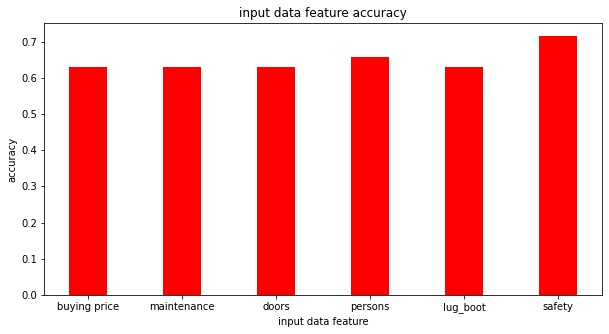

In [ ]:
data = {'buying price':accuracy1, 'maintenance':accuracy2, 'doors':accuracy3,'persons':accuracy4,'lug_boot':accuracy5,'safety':accuracy6}
input_data = list(data.keys())
accuracy_value = list(data.values())
fig = plt.figure(figsize = (10, 5))
plt.bar(input_data, accuracy_value, color ='red', width = 0.4)
plt.xlabel("input data feature")
plt.ylabel("accuracy")
plt.title("input data feature accuracy")
plt.show()

In [32]:
index_30percent = int(0.3 * len(dataset[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = dataset[:index_30percent, :-1]
YVALID = dataset[:index_30percent, -1]
XTRAIN = dataset[index_30percent:, :-1]
YTRAIN = dataset[index_30percent:, -1]
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1)                 7         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 3.5917 - accuracy: 0.1390
[3.591733694076538, 0.13899613916873932]
[1.8407177925109863, 0.36942148208618164]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.7344 - accuracy: 0.3678 - val_loss: 3.1566 - val_accuracy: 0.1390
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 1.5290 - accuracy: 0.3628 - val_loss: 2.7354 - val_accuracy: 0.1390
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 1.3505 - accuracy: 0.3521 - val_loss: 2.3342 - val_accuracy: 0.1390
Epoch 4/256
38/38 [==============================] - 0s 

In [33]:
del_input = np.delete(dataset,0,1)#delete first column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))


518
(518, 5)
(518,)
(1210, 5)
(1210,)
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 1.5665 - accuracy: 0.1834
[1.5665279626846313, 0.18339768052101135]
[1.253411054611206, 0.4074380099773407]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.1805 - accuracy: 0.4041 - val_loss: 1.3096 - val_accuracy: 0.2259
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 1.0461 - accuracy: 0.4281 - val_loss: 1.0899 - val_accuracy: 0.3147
Epoch 3/256
38/38 [==============================] - 0s 3ms/step - loss: 0.9449 - accuracy: 0.4355 - val_loss: 0.9169 - val_accuracy: 0.4170
Epoch 4/256
38/38 [====

In [34]:
del_input = np.delete(dataset,1,1)#delete second column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 5)
(518,)
(1210, 5)
(1210,)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.7964 - accuracy: 0.5154
[0.7963788509368896, 0.5154440402984619]
[1.281006932258606, 0.4223140478134155]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.2180 - accuracy: 0.4347 - val_loss: 0.6765 - val_accuracy: 0.6062
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 1.1048 - accuracy: 0.4488 - val_loss: 0.5961 - val_accuracy: 0.6911
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 1.0166 - accuracy: 0.4504 - val_loss: 0.5472 - val_accuracy: 0.7683
Epoch 4/256
38/38 [=====

In [35]:
del_input = np.delete(dataset,2,1)#delete third column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 5)
(518,)
(1210, 5)
(1210,)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 2.4955 - accuracy: 0.1544
[2.4955289363861084, 0.15444014966487885]
[1.7317497730255127, 0.3752066195011139]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.6499 - accuracy: 0.3769 - val_loss: 2.1817 - val_accuracy: 0.1699
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 1.4866 - accuracy: 0.3818 - val_loss: 1.8800 - val_accuracy: 0.2066
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 1.3317 - accuracy: 0.4041 - val_loss: 1.5982 - val_accuracy: 0.2375
Epoch 4/256
38/38 [===

In [36]:
del_input = np.delete(dataset,3,1)#delete fourth column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 5)
(518,)
(1210, 5)
(1210,)
Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.8982 - accuracy: 0.3494
[0.8981868624687195, 0.34942084550857544]
[1.016435146331787, 0.3983471095561981]
Epoch 1/256
38/38 [==============================] - 0s 7ms/step - loss: 0.9712 - accuracy: 0.4083 - val_loss: 0.7613 - val_accuracy: 0.4826
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 0.8887 - accuracy: 0.4289 - val_loss: 0.6607 - val_accuracy: 0.6332
Epoch 3/256
38/38 [==============================] - 0s 3ms/step - loss: 0.8252 - accuracy: 0.4562 - val_loss: 0.5856 - val_accuracy: 0.7413
Epoch 4/256
38/38 [====

In [37]:
del_input = np.delete(dataset,4,1)#delete fith column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 5)
(518,)
(1210, 5)
(1210,)
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 1.6232 - accuracy: 0.1795
[1.6232218742370605, 0.17953668534755707]
[1.4386367797851562, 0.35702478885650635]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.3772 - accuracy: 0.3479 - val_loss: 1.3775 - val_accuracy: 0.2452
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 1.2720 - accuracy: 0.3529 - val_loss: 1.1900 - val_accuracy: 0.3127
Epoch 3/256
38/38 [==============================] - 0s 3ms/step - loss: 1.1925 - accuracy: 0.3455 - val_loss: 1.0460 - val_accuracy: 0.3900
Epoch 4/256
38/38 [==

In [38]:
del_input = np.delete(dataset,5,1)#delete sixth column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 5)
(518,)
(1210, 5)
(1210,)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.5731 - accuracy: 0.8610
[0.5731302499771118, 0.8610038757324219]
[1.296883225440979, 0.5619834661483765]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.2541 - accuracy: 0.5562 - val_loss: 0.5324 - val_accuracy: 0.8494
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 1.1710 - accuracy: 0.5322 - val_loss: 0.4980 - val_accuracy: 0.8436
Epoch 3/256
38/38 [==============================] - 0s 3ms/step - loss: 1.1064 - accuracy: 0.5091 - val_loss: 0.4763 - val_accuracy: 0.8320
Epoch 4/256
38/38 [=====

In [40]:
del_input = np.delete(dataset,0,1)#delete first column
index_30percent = int(0.3 * len(del_input[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input[:index_30percent, :-1]
YVALID = del_input[:index_30percent, -1]
XTRAIN = del_input[index_30percent:, :-1]
YTRAIN = del_input[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 5)
(518,)
(1210, 5)
(1210,)
Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 1)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.8185
[0.4649110436439514, 0.8185328245162964]
[0.9715849757194519, 0.5834710597991943]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 0.9367 - accuracy: 0.5628 - val_loss: 0.4842 - val_accuracy: 0.7838
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 0.8827 - accuracy: 0.5364 - val_loss: 0.5112 - val_accuracy: 0.7510
Epoch 3/256
38/38 [==============================] - 0s 3ms/step - loss: 0.8492 - accuracy: 0.5017 - val_loss: 0.5360 - val_accuracy: 0.7239
Epoch 4/256
38/38 [====

In [41]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
index_30percent = int(0.3 * len(del_input12[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input12[:index_30percent, :-1]
YVALID = del_input12[:index_30percent, -1]
XTRAIN = del_input12[index_30percent:, :-1]
YTRAIN = del_input12[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 4)
(518,)
(1210, 4)
(1210,)
Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 2ms/step - loss: 1.7562 - accuracy: 0.1390
[1.7561967372894287, 0.13899613916873932]
[1.2449146509170532, 0.36859503388404846]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.1656 - accuracy: 0.3686 - val_loss: 1.5044 - val_accuracy: 0.1390
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 1.0164 - accuracy: 0.3686 - val_loss: 1.2766 - val_accuracy: 0.1390
Epoch 3/256
38/38 [==============================] - 0s 3ms/step - loss: 0.8909 - accuracy: 0.3686 - val_loss: 1.0755 - val_accuracy: 0.1390
Epoch 4/256
38/38 [==

In [42]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
del_input123 = np.delete(del_input,0,1)#delete third column which is the first column using dataset del_input12
index_30percent = int(0.3 * len(del_input123[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input123[:index_30percent, :-1]
YVALID = del_input123[:index_30percent, -1]
XTRAIN = del_input123[index_30percent:, :-1]
YTRAIN = del_input123[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 4)
(518,)
(1210, 4)
(1210,)
Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_23 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.7073 - accuracy: 0.8610
[0.7073453664779663, 0.8610038757324219]
[1.796064853668213, 0.6314049363136292]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 1.7282 - accuracy: 0.6314 - val_loss: 0.6621 - val_accuracy: 0.8610
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 1.5843 - accuracy: 0.6314 - val_loss: 0.6206 - val_accuracy: 0.8610
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 1.4488 - accuracy: 0.6306 - val_loss: 0.5869 - val_accuracy: 0.8514
Epoch 4/256
38/38 [=====

In [43]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
del_input123 = np.delete(del_input,0,1)#delete third column which is the first column using dataset del_input12
del_input1235 = np.delete(del_input,1,1)#delete fifth column which is the second column using dataset del_input123
index_30percent = int(0.3 * len(del_input1235[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input1235[:index_30percent, :-1]
YVALID = del_input1235[:index_30percent, -1]
XTRAIN = del_input1235[index_30percent:, :-1]
YTRAIN = del_input1235[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 4)
(518,)
(1210, 4)
(1210,)
Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.6729 - accuracy: 0.5753
[0.6729205846786499, 0.5752895474433899]
[0.6747506856918335, 0.6049586534500122]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 0.6674 - accuracy: 0.6050 - val_loss: 0.6215 - val_accuracy: 0.6873
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 0.6557 - accuracy: 0.6099 - val_loss: 0.5872 - val_accuracy: 0.7162
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 0.6469 - accuracy: 0.6306 - val_loss: 0.5659 - val_accuracy: 0.7548
Epoch 4/256
38/38 [====

In [45]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
del_input123 = np.delete(del_input,0,1)#delete third column which is the first column using dataset del_input12
del_input1235 = np.delete(del_input,1,1)#delete fifth column which is the second column using dataset del_input123
del_input12354 = np.delete(del_input,0,1)#delete fourth column which is the first column using dataset del_input1235
index_30percent = int(0.3 * len(del_input12354[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input12354[:index_30percent, :-1]
YVALID = del_input12354[:index_30percent, -1]
XTRAIN = del_input12354[index_30percent:, :-1]
YTRAIN = del_input12354[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 4)
(518,)
(1210, 4)
(1210,)
Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8610
[0.4640021324157715, 0.8610038757324219]
[1.0206544399261475, 0.6314049363136292]
Epoch 1/256
38/38 [==============================] - 0s 4ms/step - loss: 0.9610 - accuracy: 0.6281 - val_loss: 0.4452 - val_accuracy: 0.8514
Epoch 2/256
38/38 [==============================] - 0s 2ms/step - loss: 0.8524 - accuracy: 0.6372 - val_loss: 0.4394 - val_accuracy: 0.8436
Epoch 3/256
38/38 [==============================] - 0s 2ms/step - loss: 0.7590 - accuracy: 0.6562 - val_loss: 0.4480 - val_accuracy: 0.8127
Epoch 4/256
38/38 [====

In [44]:
del_input = np.delete(dataset,0,1)#delete first column
del_input12 = np.delete(del_input,0,1)#delete second column which is the first column using dataset del_input
del_input123 = np.delete(del_input,0,1)#delete third column which is the first column using dataset del_input12
del_input1235 = np.delete(del_input,1,1)#delete fifth column which is the second column using dataset del_input123
del_input12354 = np.delete(del_input,0,1)#delete fourth column which is the first column using dataset del_input1235
del_input123546 = np.delete(del_input,0,1)#delete sixth column which is the first column using dataset del_input12354
index_30percent = int(0.3 * len(del_input123546[:, 0]))
print(index_30percent)
# Split into training and validation, 30% validation set and 70% training 
XVALID = del_input123546[:index_30percent, :-1]
YVALID = del_input123546[:index_30percent, -1]
XTRAIN = del_input123546[index_30percent:, :-1]
YTRAIN = del_input123546[index_30percent:, -1]
print(XVALID.shape)
print(YVALID.shape)
print(XTRAIN.shape)
print(YTRAIN.shape)
model = Sequential()
model.add(Dense(1, input_dim = len(XTRAIN[0, :]), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])
model.summary()
# Learn the model from training set
model.fit(XTRAIN, YTRAIN)
# Evaluate on the training set (should deliver high accuracy)
p_training = model.predict(XTRAIN)
accuracyt = model.evaluate(XTRAIN, YTRAIN)
#Evaluate on the validation set
p_valid = model.predict(XTRAIN)
accuracyv = model.evaluate(XVALID, YVALID)
print(accuracyv)
print(accuracyt)
# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs  = 256)
prediction = model.predict(XTRAIN)
# Check what's in the history
print(history.params)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(YTRAIN, prediction.round())
precision = precision_score(YTRAIN, prediction.round())
recall = recall_score(YTRAIN, prediction.round())
f1score = f1_score(YTRAIN, prediction.round())
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Precision: %.2f%%" % (precision * 100.0))
print("Recall: %.2f%%" % (recall * 100.0))
print("F1-score: %.2f" % (f1score))

518
(518, 4)
(518,)
(1210, 4)
(1210,)
Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________
17/17 [==============================] - 0s 1ms/step - loss: 1.7577 - accuracy: 0.1815
[1.7576923370361328, 0.1814671754837036]
[1.4885815382003784, 0.3785123825073242]
Epoch 1/256
38/38 [==============================] - 0s 3ms/step - loss: 1.4257 - accuracy: 0.3686 - val_loss: 1.5445 - val_accuracy: 0.2162
Epoch 2/256
38/38 [==============================] - 0s 3ms/step - loss: 1.3025 - accuracy: 0.3636 - val_loss: 1.3504 - val_accuracy: 0.2625
Epoch 3/256
38/38 [==============================] - 0s 3ms/step - loss: 1.2039 - accuracy: 0.3413 - val_loss: 1.1865 - val_accuracy: 0.3089
Epoch 4/256
38/38 [====